In [2]:
import matplotlib.pyplot as plt
import aplpy
from astropy.wcs import WCS
from astropy.io import fits, ascii
from astropy.utils.data import get_pkg_data_filename
from astroquery.skyview import SkyView
import ssl
import aplpy
from lens import Lens
from astropy.table import Table
import sqlutil as sqlutil
import numpy as np
import lensutils as util


candidates = Table.read('data/candidatesDistTime.txt',format='ascii')
#candidates = Table.read('data/largpmcandidates.txt',format='ascii')
timeMask = (candidates['Closest_approah_time[JYr]'] > 2018.0)
#candidates = candidates[timeMask]
TGASlensid = candidates['TGAS_id']
ppmxlid = candidates['ppmxl_id']
#CloseApp = candidates['Closest_approach_Dist[mas]'] 
#timeApp = candidates['Closest_approah_time[JYr]']
#imsize = 2

for i in range(0,0):
    
    querystringTGAS = 'select ra, dec, source_id,pmra,pmdec,ref_epoch, phot_g_mean_mag from gaia_dr1.tgas_source where source_id=' + str(TGASlensid[i])
    querystringPPMXL ='select ra, dec, id, epochra, epochdec,jmag,hmag,kmag,b1mag,b2mag,r1mag,r2mag from ppmxl.main where id=' + str(ppmxlid[i])

    lensRa, lensDec, id,pmra,pmdec,ref_epoch, gmag = sqlutil.get(querystringTGAS,
                                                           db='wsdb',host='cappc127.ast.cam.ac.uk', user='peter_mcgill', password='Ln3g.wsk')

    testlens1 = Lens(id[0],lensRa[0],lensDec[0],pmra[0],pmdec[0],ref_epoch[0])

    sourceRa, sourceDec,sourceId, epochra, epochdec, jmag,hmag,kmag,b1mag,b2mag,r1mag,r2mag = sqlutil.get(querystringPPMXL,
                       db='wsdb',host='cappc127.ast.cam.ac.uk', user='peter_mcgill', password='Ln3g.wsk')

    util.plt_lens_env(testlens1,sourceRa[0],sourceDec[0],sourceId[0],[jmag[0],hmag[0],kmag[0],b1mag[0],b2mag[0],r1mag[0],r2mag[0]],gmag[0])
    
    
    


In [70]:
url = "http://legacysurvey.org/viewer/fits-cutout?layer=decaps2&dec=-64.84329779&ra=176.46360456&zoom=14&size=500"
hdulist = fits.open(url)

INFO: Auto-setting vmin to -5.884e-01 [aplpy.core]
INFO: Auto-setting vmax to  6.345e+00 [aplpy.core]


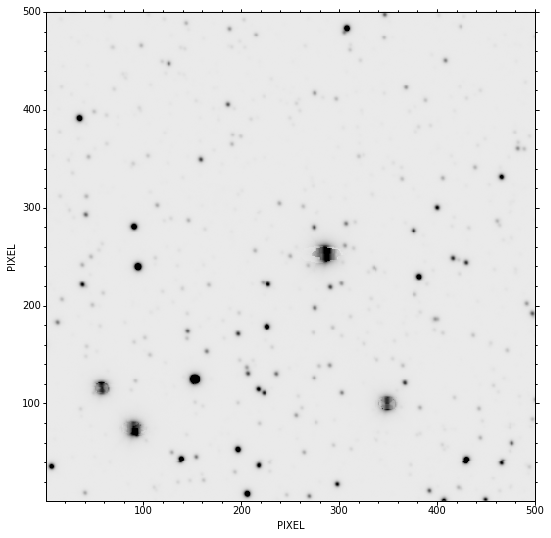

SIMPLE  =                    T / file does conform to FITS standard             BITPIX  =                  -32 / number of bits per data pixel                  NAXIS   =                    3 / number of data axes                            NAXIS1  =                  500 / length of data axis 1                          NAXIS2  =                  500 / length of data axis 2                          NAXIS3  =                    3 / length of data axis 3                          EXTEND  =                    T / FITS dataset may contain extensions            COMMENT   FITS (Flexible Image Transport System) format is defined in 'AstronomyCOMMENT   and Astrophysics', volume 376, page 359; bibcode: 2001A&A...376..359H SURVEY  = 'DECaLS  '                                                            VERSION = 'DECaPS  '                                                            IMAGETYP= 'image   '                                                            BANDS   = 'grz     '                    

In [97]:
fig = aplpy.FITSFigure(hdulist[0].data[1])
fig.show_colorscale(cmap='gray_r')
plt.show()
plt.clf()

print(hdulist[0].header)



In [82]:
#####2MASS ##### - not currently being used - DSS more complete.
filter_2m = 'k' # 2mass filter to use
imsize = 2

metadata_url = 'http://irsa.ipac.caltech.edu/ibe/search/twomass/allsky/allsky?POS={0},{1}'.format(176.46360456,-64.84329779)
metadata = ascii.read(metadata_url, Reader=ascii.ipac.Ipac)

#selecting the first obs in the requested filter in case there is more than one
target_obs = metadata[metadata['filter']==filter_2m][0]

params = { 'ordate': target_obs['ordate'],
       'hemisphere': target_obs['hemisphere'],
       'scanno': target_obs['scanno'],
       'fname': target_obs['fname'],
       'ra':176.46360456 ,
       'de': -64.84329779,
       'imsize': imsize }

cutout_path = "{ordate}{hemisphere}/s{scanno}/image/{fname}?center={ra},{de}&size={imsize}arcmin".format(**params)
cutout_url = 'http://irsa.ipac.caltech.edu/ibe/data/twomass/allsky/allsky/' + cutout_path

hdulist = fits.open(cutout_url)
print(hdulist[0].header['ordate'])


HTTPError: HTTP Error 404: Not Found

In [85]:
#DSS Search
url = "http://stdatu.stsci.edu/cgi-bin/dss_search?v=poss2ukstu_red&r={ra}&d={de}&e=J2000&h={imsize}&w={imsize}&f=fits".format(**params)
hdulist = fits.open(url)

print(url)

#Find the time the image was taken YYYY-MM-DD
timeString  = hdulist[0].header['DATE-OBS'][:10]
print(timeString)

http://stdatu.stsci.edu/cgi-bin/dss_search?v=poss2ukstu_red&r=176.46360456&d=-64.84329779&e=J2000&h=2&w=2&f=fits
1998-03-19
